# CSC713M Problem Set - Supervised and Unsupervised Learning

### Importing the libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, confusion_matrix
from sklearn.decomposition import PCA
from minisom import MiniSom
from kneed import KneeLocator
from pylab import rcParams

### Loading the dataset

In [3]:
# Load the dataset
data = pd.read_csv('animal_dataset.csv')
data.head()

,hair,scales,feather,moist skin,sexual reproduction,asexual reproduction,vivipirous,oviparous,hard-shelled eggs,soft eggs,...,antennae,tail,venomous,aquatic,terrestrial,airborne,asymmetrical,symmetrical,Class,Name
0,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,Amphibians,african clawed flog
1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,black toad
2,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,boreal toad
3,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,bronze frog
4,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,cane toad


### Splitting the dataset

In [4]:
# Split into features and target variable
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']

# Convert categorical labels into numerical values
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Helper Functions

In [5]:
# Helper function to calculate metrics and display results
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(model, X_test, y_test, cv=5, scoring=scoring)
    
    print(f"Metrics for {model_name}:")
    print("Accuracy:", cv_results['test_accuracy'].mean())
    print("Precision:", cv_results['test_precision_macro'].mean())
    print("Recall:", cv_results['test_recall_macro'].mean())
    print("F1 Score:", cv_results['test_f1_macro'].mean())
    
    # Fit the model on the entire training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - ' + model_name)
    plt.show()

## Supervised Learning
### Logistic Regression

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Metrics for Logistic Regression:
Accuracy: 0.9846153846153847
Precision: 0.9916666666666666
Recall: 0.9875
F1 Score: 0.9866666666666667


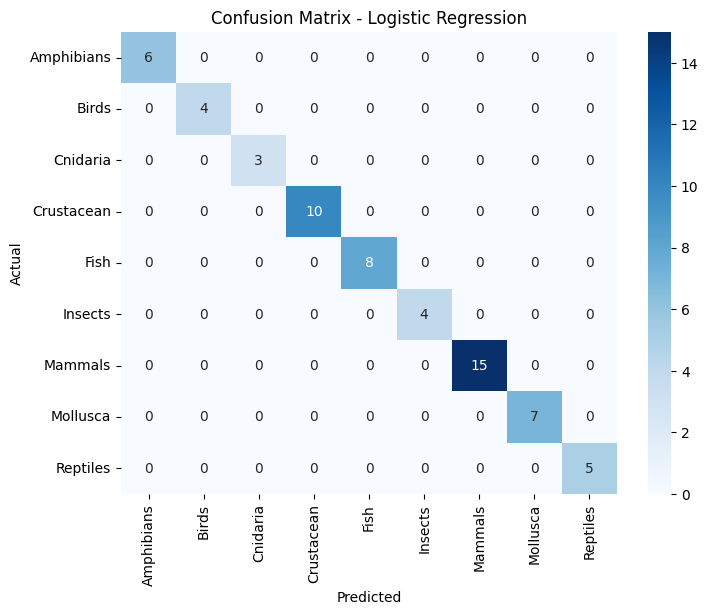

In [6]:
evaluate_model(LogisticRegression(), "Logistic Regression")

### k Nearest Neighbors

In [7]:
for k in [1, 5, 9]:
    evaluate_model(KNeighborsClassifier(n_neighbors=k), f"kNN (k={k})")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\m

Metrics for kNN (k=1):
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan


AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Multi-layered Perceptron

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Metrics for Multi-layered Perceptron:
Accuracy: 0.9846153846153847
Precision: 0.9916666666666666
Recall: 0.9875
F1 Score: 0.9866666666666667


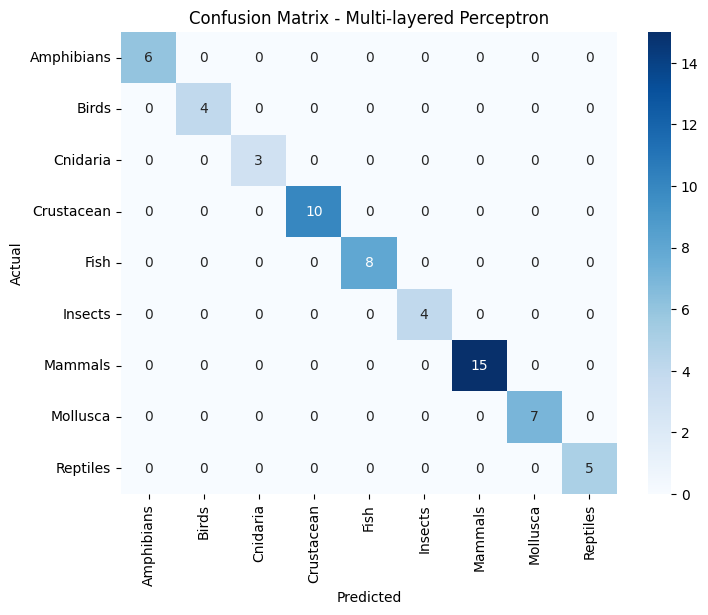

In [8]:
evaluate_model(MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500), "Multi-layered Perceptron")

## Unsupervised Learning
### k-Means Clustering

In [11]:
data.head()

,hair,scales,feather,moist skin,sexual reproduction,asexual reproduction,vivipirous,oviparous,hard-shelled eggs,soft eggs,...,antennae,tail,venomous,aquatic,terrestrial,airborne,asymmetrical,symmetrical,Class,Name
0,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,Amphibians,african clawed flog
1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,black toad
2,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,boreal toad
3,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,bronze frog
4,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,cane toad


In [19]:
data_features_only = data.drop(['Class', 'Name'], axis=1)
data_features_only

,hair,scales,feather,moist skin,sexual reproduction,asexual reproduction,vivipirous,oviparous,hard-shelled eggs,soft eggs,...,bill/beak,jaw,antennae,tail,venomous,aquatic,terrestrial,airborne,asymmetrical,symmetrical
0,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
1,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
200,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
201,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
202,0,1,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1


In [33]:
data_classes = data['Class'].unique()
data_classes

array(['Amphibians', 'Birds', 'Cnidaria', 'Crustacean', 'Fish', 'Insects',
       'Mammals', 'Mollusca', 'Reptiles'], dtype=object)

In [42]:
dbi_scores = []
K = range(7, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(data_features_only)
    labels = kmeans.labels_
    dbi_score = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi_score)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

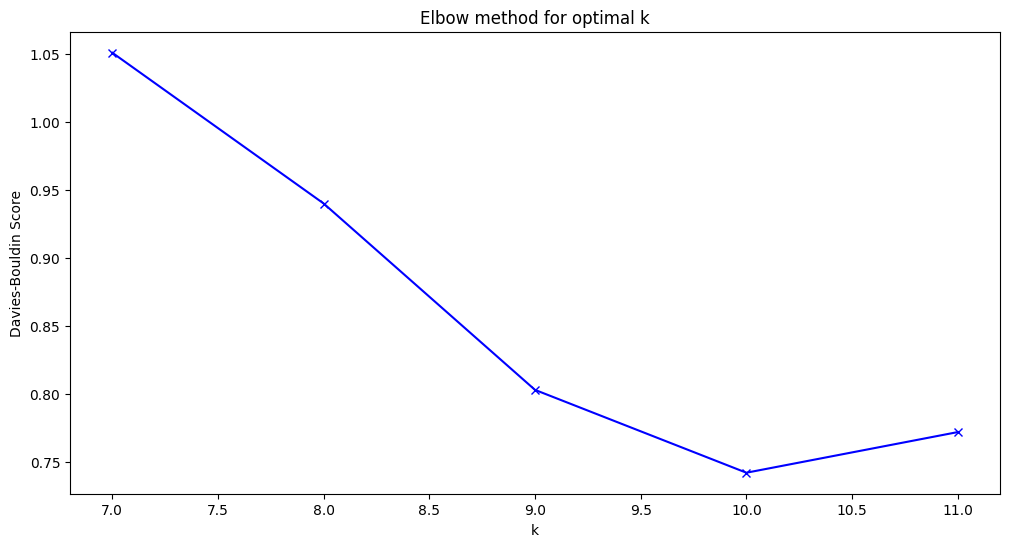

In [43]:
plt.figure(figsize=(12,6))
plt.plot(K, dbi_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Elbow method for optimal k')
plt.show()

### k-Means and Self-Organizing Map for Data Visualization

### unfinished, don't know yet how to implement kmeans + SOM together (need to rewatch lecture)

In [49]:
X = data_features_only.values
le = LabelEncoder()
y = le.fit_transform(data['Class'].values)
names = data['Name'].values

In [50]:
som = MiniSom(7, 7, X.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(X, 100)

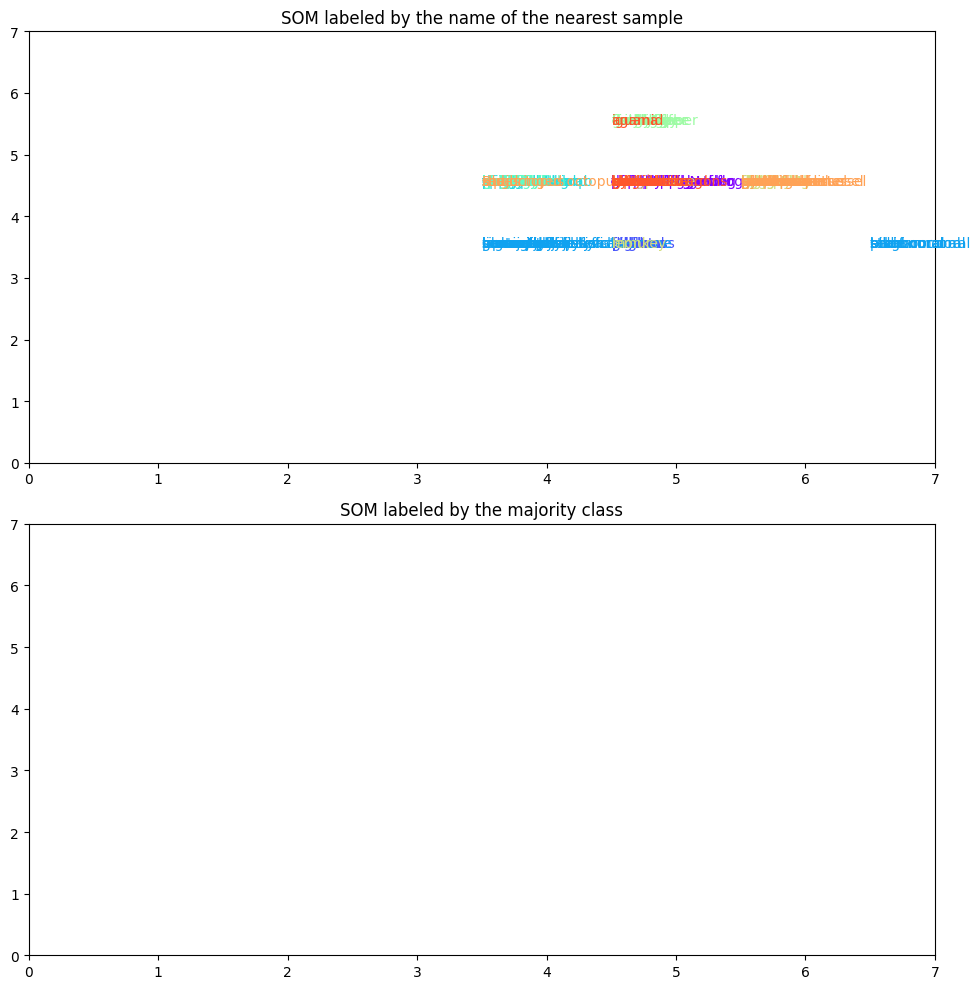

In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0]+.5,  w[1]+.5,  names[i],
             color=plt.cm.rainbow(y[i] / len(set(y))), 
             transform=plt.gca().transData)

plt.title('SOM labeled by the name of the nearest sample')
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])

plt.subplot(2, 1, 2)
labels_map = som.labels_map(X, y)
label_names = np.unique(y)

for i, l in enumerate(label_names):
    if l in labels_map:
        x, y = labels_map[l]
        plt.text(x+.5,  y+.5,  str(l),
                 color=plt.cm.rainbow(i / len(label_names)), 
                 transform=plt.gca().transData)

plt.title('SOM labeled by the majority class')
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])

plt.tight_layout()
plt.show()
